In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
df = pd.read_csv('Ames Housing Data Encoding Edited.csv')

In [3]:
df.head(10)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin Type 1,Total Bsmt SF,Heating QC,1st Flr SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,6,1960,1960,112.0,2,3,4,1080.0,1,1656,...,0,0,0,0,1,0,0,0,1,0
1,5,1961,1961,0.0,2,3,3,882.0,2,896,...,0,0,0,0,1,0,0,0,1,0
2,6,1958,1958,108.0,2,3,5,1329.0,2,1329,...,0,0,0,0,1,0,0,0,1,0
3,7,1968,1968,0.0,3,3,5,2110.0,4,2110,...,0,0,0,0,1,0,0,0,1,0
4,5,1997,1998,0.0,2,4,6,928.0,3,928,...,0,0,0,0,1,0,0,0,1,0
5,6,1998,1998,20.0,2,3,6,926.0,4,926,...,0,0,0,0,1,0,0,0,1,0
6,8,2001,2001,0.0,3,4,6,1338.0,4,1338,...,0,0,0,0,1,0,0,0,1,0
7,8,1992,1992,0.0,3,4,5,1280.0,4,1280,...,0,0,0,0,1,0,0,0,1,0
8,8,1995,1996,0.0,3,4,6,1595.0,4,1616,...,0,0,0,0,1,0,0,0,1,0
9,7,1999,1999,0.0,2,3,1,994.0,3,1028,...,0,0,0,0,1,0,0,0,1,0


In [4]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import ElasticNet

In [6]:
base_elastic_model = ElasticNet()

In [7]:
param_grid = {'alpha':[0.1,1,5,10,50,80,100],
              'l1_ratio':[.1, .5, .7, .8, .9, .95, .99, 1]}

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid_model = GridSearchCV

In [10]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10,
                          verbose=2)

In [11]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.3s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.3s
[CV] 

[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.8, total=   0.1s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.1s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.1s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.1s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.1s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] .

[CV] .............................. alpha=5, l1_ratio=1, total=   0.1s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.1s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.8 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] a

[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.1s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   32.3s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 80, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [12]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [13]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [14]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.146908,0.038182,0.042503,0.039230,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-0.003258,-0.003606,-0.003351,-0.003178,-0.002863,-0.004386,-0.002913,-0.003412,-0.003119,-0.003830,-0.003392,0.000433,1
1,0.106006,0.027851,0.055803,0.053027,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-0.009532,-0.009036,-0.007483,-0.008708,-0.007665,-0.010146,-0.007734,-0.007839,-0.009145,-0.009627,-0.008692,0.000904,2
2,0.102806,0.035924,0.025201,0.028126,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-0.014104,-0.013548,-0.010749,-0.013186,-0.011403,-0.014382,-0.011726,-0.011159,-0.013926,-0.014128,-0.012831,0.001339,3
3,0.120107,0.050819,0.039602,0.019238,0.1,0.8,"{'alpha': 0.1, 'l1_ratio': 0.8}",-0.016137,-0.015890,-0.012352,-0.015508,-0.013280,-0.016599,-0.013783,-0.012829,-0.016408,-0.016188,-0.014897,0.001561,4
4,0.056003,0.030651,0.041202,0.055779,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-0.017954,-0.018051,-0.014120,-0.017596,-0.015073,-0.018820,-0.016023,-0.014426,-0.018733,-0.018189,-0.016898,0.001720,5
5,0.073304,0.035224,0.026302,0.017391,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-0.018746,-0.019026,-0.014856,-0.018526,-0.015830,-0.019796,-0.017014,-0.015250,-0.019780,-0.019073,-0.017790,0.001792,6
6,0.080305,0.049460,0.009201,0.021698,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-0.019415,-0.019849,-0.015479,-0.019310,-0.016475,-0.020617,-0.017853,-0.015894,-0.020662,-0.019819,-0.018537,0.001861,7
7,0.063604,0.032155,0.021501,0.039434,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-0.019587,-0.020060,-0.015640,-0.019511,-0.016642,-0.020827,-0.018069,-0.016060,-0.020889,-0.020011,-0.018730,0.001879,8
8,0.043002,0.008603,0.007100,0.011563,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-0.022600,-0.023537,-0.018287,-0.022793,-0.019443,-0.024114,-0.021473,-0.018802,-0.024561,-0.023276,-0.021889,0.002161,9
9,0.037202,0.009261,0.015601,0.015687,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-0.027141,-0.028574,-0.022895,-0.027757,-0.024150,-0.029281,-0.026725,-0.023414,-0.029711,-0.028074,-0.026772,0.002328,10


In [15]:
y_pred = grid_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [18]:
MAE

0.042989254863861175

In [19]:
RMSE

0.059573719115539506

In [20]:
100*RMSE/df['SalePrice'].mean()

1.141812435907689

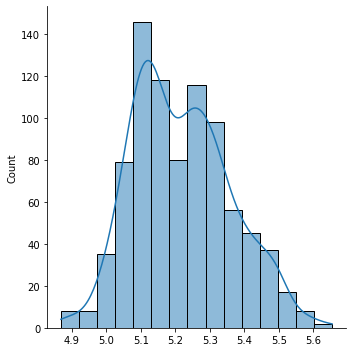

In [21]:
sns.displot(y_pred,bins=15,kde=True)

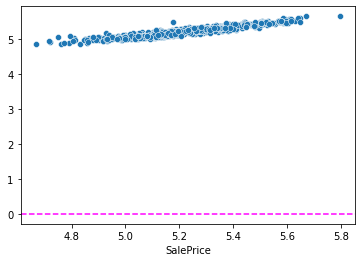

In [22]:
sns.scatterplot(x=y_test,y=y_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

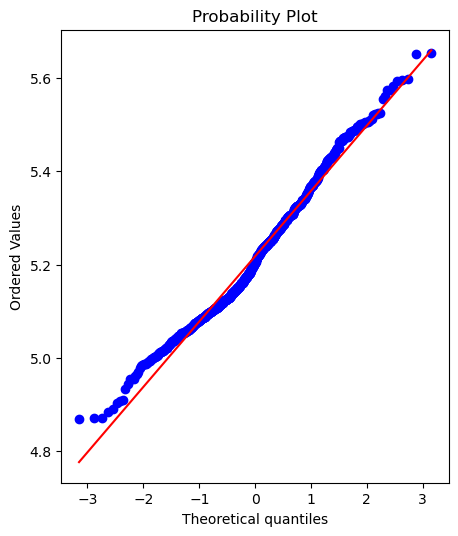

In [23]:
fig,ax = plt.subplots(figsize=(5,6),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

In [24]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.99, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.99 ........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.0s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .......................... alpha=10, l1_ratio=0.99, total=   0.1s
[CV] alpha=10, l1_ratio=0.99 .........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.8, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.1s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=80, l1_ratio=0.7, total=   0.0s
[CV] alpha=80, l1_ratio=0.7 ..........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.1s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.1s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.0s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.1s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] ......................... alpha=100, l1_ratio=0.99, total=   0.1s
[CV] alpha=100, l1_ratio=0.99 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   22.3s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 80, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

**Lasso CV**

In [25]:
from sklearn.linear_model import LassoCV

In [26]:
model = LassoCV()

In [27]:
model.fit(X_train, y_train)

LassoCV()

In [28]:
model.alpha_

0.0004400979395294919

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
mean_squared_error(y_test,y_pred)

0.0024722382078838025

In [32]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [33]:
100*RMSE/df['SalePrice'].mean()

0.9529831292849029

In [34]:
test_pred = y_test - y_pred

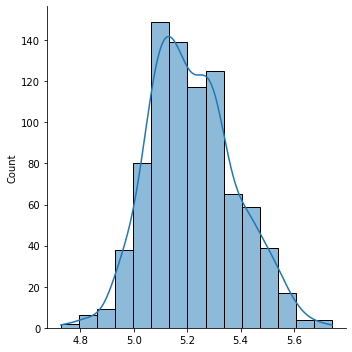

In [35]:
sns.displot(y_pred,bins=15,kde=True)

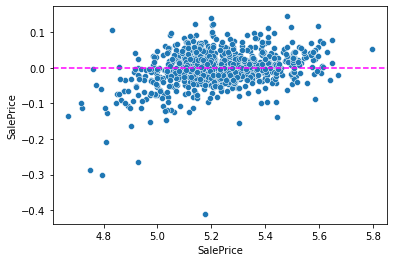

In [36]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

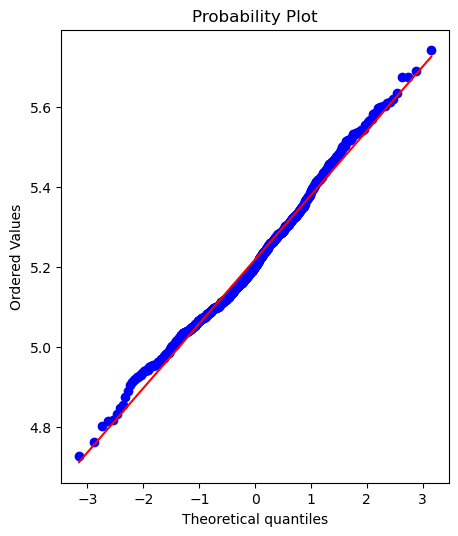

In [37]:
fig,ax = plt.subplots(figsize=(5,6),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

**Feature selection by using Lasso CV**

In [38]:
model.fit(X, y)

LassoCV()

In [39]:
y_pred = model.predict(X)

In [40]:
model.coef_

array([ 0.00000000e+00,  1.20901526e-03,  1.34878830e-03,  3.67551792e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.82943555e-05,
        0.00000000e+00,  4.99429848e-06,  1.44547129e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.42208168e-04,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [41]:
x = model.coef_

In [42]:
np.where(x>0)

(array([ 1,  2,  3,  7,  9, 10, 19], dtype=int64),)

In [43]:
df.columns[[ 1,  2,  3,  7,  9, 10, 19]]

Index(['Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Garage Area'],
      dtype='object')

In [44]:
df = df[['Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF','1st Flr SF', 'Gr Liv Area', 'Garage Area']]

In [45]:
df

,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,1960,1960,112.0,1080.0,1656,1656,528.0
1,1961,1961,0.0,882.0,896,896,730.0
2,1958,1958,108.0,1329.0,1329,1329,312.0
3,1968,1968,0.0,2110.0,2110,2110,522.0
4,1997,1998,0.0,928.0,928,1629,482.0
...,...,...,...,...,...,...,...
2838,1984,1984,0.0,1003.0,1003,1003,588.0
2839,1983,1983,0.0,864.0,902,902,484.0
2840,1992,1992,0.0,912.0,970,970,0.0
2841,1974,1975,0.0,1389.0,1389,1389,418.0
